Train a boosted ensemble of decision-trees (gradient boosted trees) on the lending club dataset

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
loans = pd.read_csv("lending-club-data.csv")

C:\Users\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
old_columns = loans.columns
old_columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

In [5]:
loans["safe_loans"] = loans["bad_loans"].apply(lambda x : 1 if x == 0 else -1)
loans.drop("bad_loans", axis = 1)
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]
target = ['safe_loans']

In [6]:
loans = loans[features + target]

In [7]:
loans_with_na = loans.copy()

In [8]:
loans_with_na.isnull().sum(axis = 0)

grade                     0
sub_grade_num             0
short_emp                 0
emp_length_num            0
home_ownership            0
dti                       0
purpose                   0
payment_inc_ratio         4
delinq_2yrs              29
delinq_2yrs_zero         29
inq_last_6mths           29
last_delinq_none          0
last_major_derog_none     0
open_acc                 29
pub_rec                  29
pub_rec_zero             29
revol_util                0
total_rec_late_fee        0
int_rate                  0
total_rec_int             0
annual_inc                4
funded_amnt               0
funded_amnt_inv           0
installment               0
safe_loans                0
dtype: int64

Count the "na", "nan" in dataframe: loans

In [9]:
loans.isnull().sum(axis = 0)

grade                     0
sub_grade_num             0
short_emp                 0
emp_length_num            0
home_ownership            0
dti                       0
purpose                   0
payment_inc_ratio         4
delinq_2yrs              29
delinq_2yrs_zero         29
inq_last_6mths           29
last_delinq_none          0
last_major_derog_none     0
open_acc                 29
pub_rec                  29
pub_rec_zero             29
revol_util                0
total_rec_late_fee        0
int_rate                  0
total_rec_int             0
annual_inc                4
funded_amnt               0
funded_amnt_inv           0
installment               0
safe_loans                0
dtype: int64

In [10]:
loans = loans.dropna()

In [11]:
loans.isnull().sum(axis = 0)

grade                    0
sub_grade_num            0
short_emp                0
emp_length_num           0
home_ownership           0
dti                      0
purpose                  0
payment_inc_ratio        0
delinq_2yrs              0
delinq_2yrs_zero         0
inq_last_6mths           0
last_delinq_none         0
last_major_derog_none    0
open_acc                 0
pub_rec                  0
pub_rec_zero             0
revol_util               0
total_rec_late_fee       0
int_rate                 0
total_rec_int            0
annual_inc               0
funded_amnt              0
funded_amnt_inv          0
installment              0
safe_loans               0
dtype: int64

In [12]:
def classdist_barplot(dataframe,target):
    # dataframe: pandas
    #target:column name
    cnt_cls = dataframe[target].value_counts()
    plt.figure(figsize=(12,4))
    sns.barplot(cnt_cls.index, cnt_cls.values, alpha=0.8)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(target, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

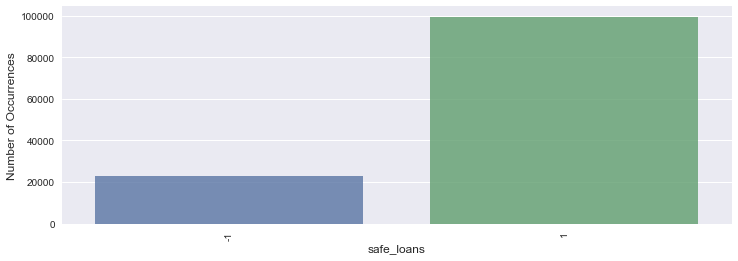

In [13]:
classdist_barplot(loans, "safe_loans")

In [14]:
with open("module-8-assignment-1-train-idx.json","r") as f:
    train_idx = json.load(f)
with open("module-8-assignment-1-validation-idx.json","r") as f:
    val_idx = json.load(f)

In [15]:
train_data = loans.iloc[train_idx]
validation_data = loans.iloc[val_idx]

In [16]:
print("training data shape:", train_data.shape)
print("validation data shape:", validation_data.shape)

training data shape: (37219, 25)
validation data shape: (9284, 25)


In [17]:
pos_class_count = (train_data["safe_loans"] == 1).sum()
neg_class_count = (train_data["safe_loans"] == -1).sum()
print("postive class count in training data:", pos_class_count)
print("negative class count in training data:", neg_class_count)

postive class count in training data: 18744
negative class count in training data: 18475


One-hot encoding
For scikit-learn's decision tree implementation,
it numerical values for it's data matrix. 
This means you will have to turn categorical variables into binary features via one-hot encoding.

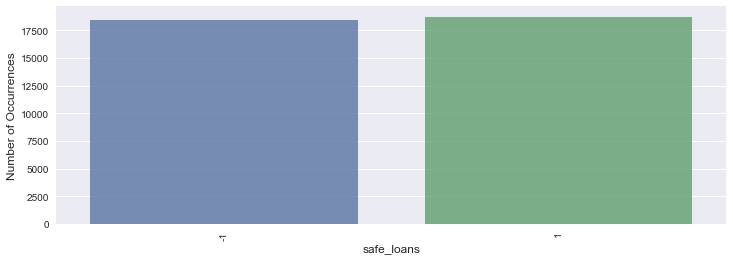

In [18]:
classdist_barplot(train_data, "safe_loans")

In [24]:
from dtree_utils import categorical_2_binary

In [29]:
train_catg2oh = categorical_2_binary(train_data, cat_feature = features, flag = False)
validation_catg2oh = categorical_2_binary(validation_data, cat_feature = features, flag = False)

In [33]:
train_X = train_catg2oh.drop("safe_loans", axis = 1).as_matrix()
train_Y = train_catg2oh["safe_loans"].as_matrix()

In [34]:
val_X = validation_catg2oh.drop("safe_loans", axis = 1).as_matrix()
val_Y = validation_catg2oh["safe_loans"].as_matrix()

In [36]:
boosting_classifier = GradientBoostingClassifier(n_estimators=5, max_depth=6)
boosting_classifier.fit(train_X,train_Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=5, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [37]:
print (train_Y.shape)
print (train_X.shape)

(37219,)
(37219, 44)


MakingPrediction

In [40]:
# Select all positive and negative examples.
validation_safe_loans = validation_catg2oh[validation_catg2oh["safe_loans"] == 1]
validation_risky_loans = validation_catg2oh[validation_catg2oh["safe_loans"] == -1]

# Select 2 examples from the validation set for positive & negative loans
sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

# Append the 4 examples into a single dataset
sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,0.2,0,3,29.44,6.30496,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
26,0.6,1,1,12.19,13.49520,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
24,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0
41,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [41]:
boosting_classifier.predict(sample_validation_data.drop("safe_loans", axis = 1).as_matrix())

array([ 1,  1, -1,  1], dtype=int64)

Quiz question: What percentage of the predictions on sample_validation_data did model_5 get correct?
    ans: 75%

In [43]:
boosting_classifier.predict_proba(sample_validation_data.drop("safe_loans", axis = 1).as_matrix())

array([[ 0.41642331,  0.58357669],
       [ 0.46949689,  0.53050311],
       [ 0.53807792,  0.46192208],
       [ 0.39591639,  0.60408361]])

Quiz Question: Which loan has the highest probability of being classified as a safe loan?
    ans: 4

Evaluate the accuracy of the model_5 on the validation_data

In [44]:
boosting_classifier.score(val_X,val_Y)

0.66146057733735464

In [45]:
prediction = boosting_classifier.predict(val_X) 

In [48]:
false_positive = ((prediction ==1) * (val_Y ==-1)).sum()
print(false_positive)

1652


Quiz Question: What is the number of false positives on the validation_data? ans: 1652

 Calculate the number of false negatives made by the model on the validation_data

In [49]:
false_negative = ((prediction == -1) * (val_Y == 1)).sum()
false_negative

1491